In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plots as we will create


In [91]:
df = pd.read_csv('movies.Csv')

In [90]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [63]:
df.shape

(7668, 15)

In [31]:
#Let's see if there is any missing data.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%' .format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [92]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [93]:

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)

df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

df['votes'] = pd.to_numeric(df['votes'], errors='coerce').fillna(0).astype(int) 

In [94]:
#Creating a year column and converting it back into a integer.
df['year_correct'] = df['released'].str.extract(pat = '([0-9]{4})').astype(str)

df['year_correct'] = pd.to_numeric(df['year_correct'], errors='coerce').fillna(0).astype(int) 

In [95]:
df.head(4)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980


In [96]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,0,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020


In [97]:
df.sort_values(by=['gross'],ascending = False ,inplace = False).head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997


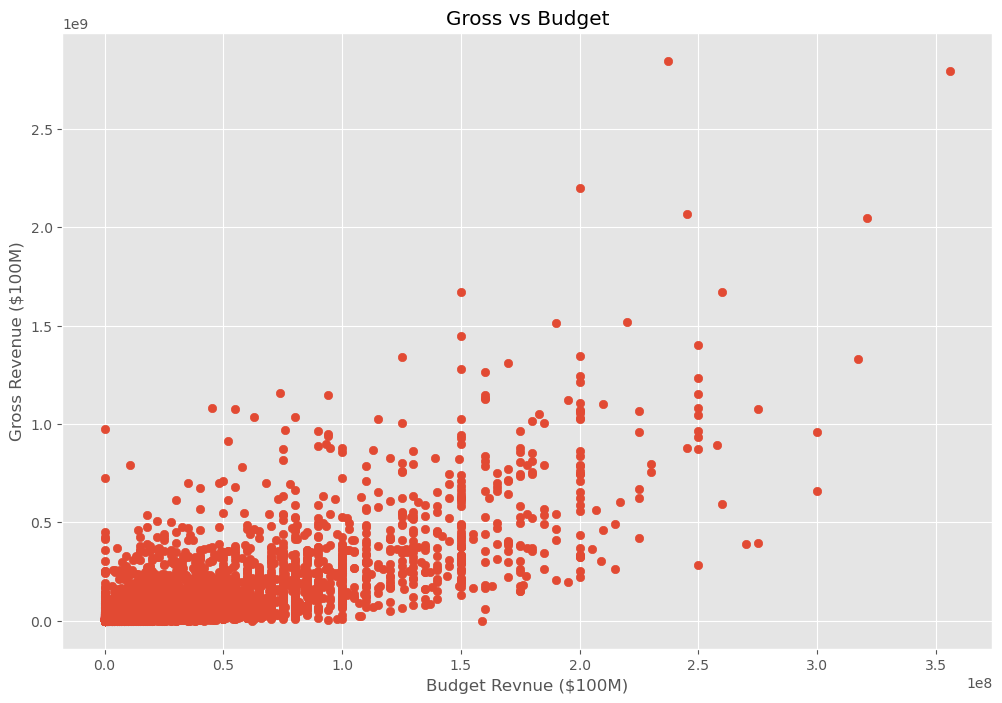

In [98]:
#creating a scaterplot for budget vs gross revenue
plt.scatter(x=df.budget, y=df.gross)
plt.title('Gross vs Budget')
plt.ylabel('Gross Revenue ($100M)')
plt.xlabel('Budget Revnue ($100M)')
plt.show()

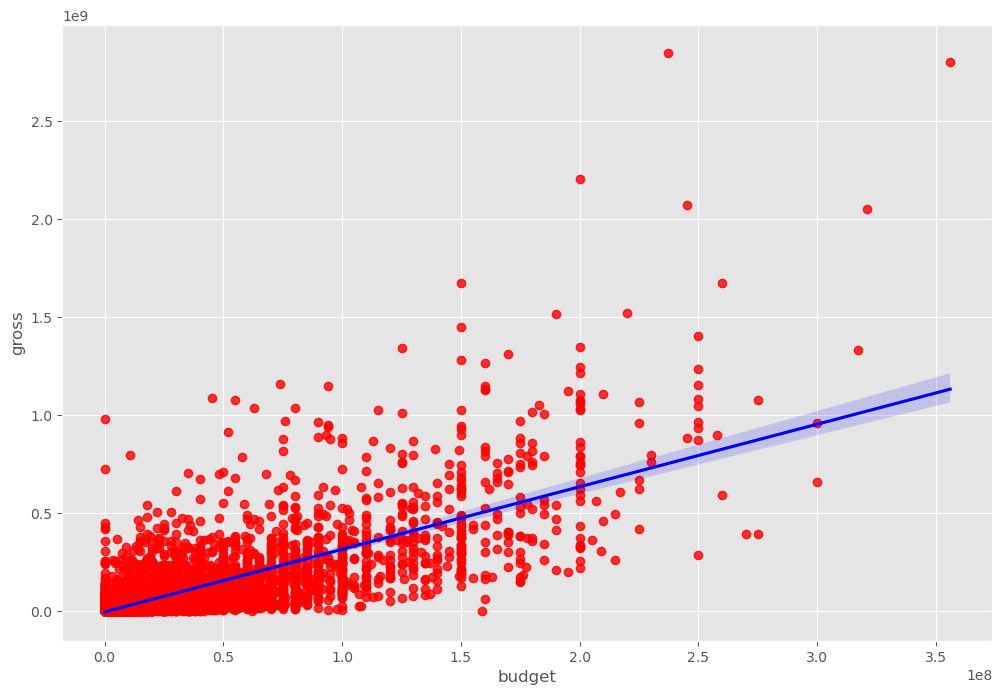

In [99]:
#Regression line added with seasborn

ax = sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})



In [100]:
#Looking at coorelations pairs

df.corr(method = 'pearson', numeric_only = True)

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.120811,0.312521
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451,0.045473
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.309122,0.070183
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.269510,0.108069
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.245235,0.090394
runtime,0.120811,0.399451,0.309122,0.269510,0.245235,1.000000,0.120636
year_correct,0.312521,0.045473,0.070183,0.108069,0.090394,0.120636,1.000000


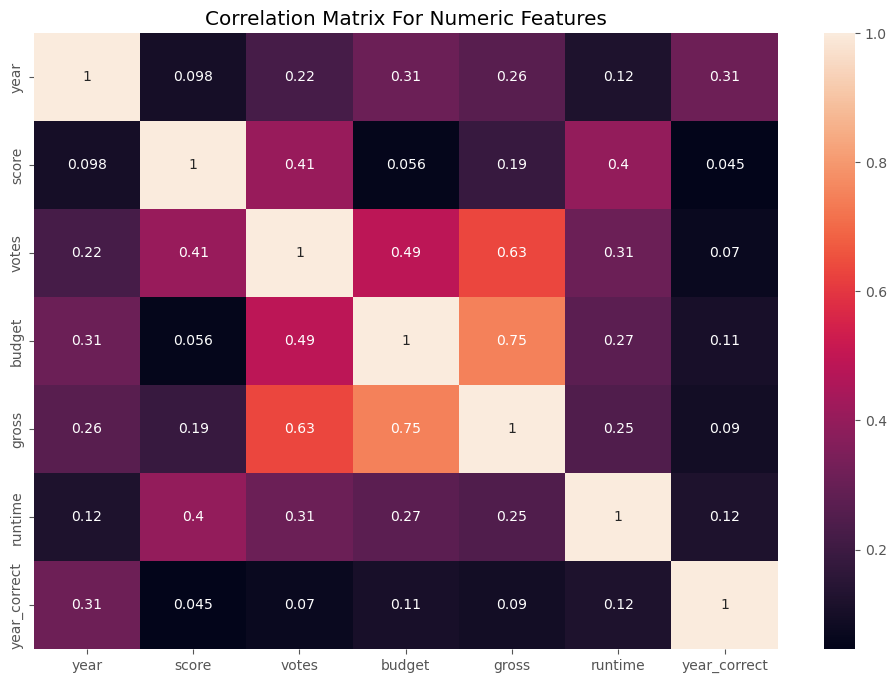

In [101]:
# Visualising correlation pairs with heatmap
correlation_matrix = df.corr(method = 'pearson', numeric_only =True)
sns.heatmap(correlation_matrix, annot =True)
plt.title('Correlation Matrix For Numeric Features')
plt.show()


In [102]:
# Looking at the companies with the highest average gross revenue per film

companies = df.groupby('company').gross.mean().reset_index()

companies.sort_values('gross', ascending=False)

,company,gross
1606,Marvel Studios,1.255466e+09
1313,Illumination Entertainment,1.097122e+09
1008,Fairview Entertainment,9.665549e+08
304,B24,8.806815e+08
294,Avi Arad Productions,8.560852e+08
...,...,...
941,Embi Productions,0.000000e+00
630,Charlie Mopic,0.000000e+00
2197,The Rejoycing Company,0.000000e+00
2202,The South Australian Film Corporation,0.000000e+00


In [104]:
 #Looking at the years with the highest average gross revenue per film

years = df.groupby('year_correct').gross.mean().reset_index()

years.sort_values('gross', ascending=False).head(3)

,year_correct,gross
38,2017,1.468640e+08
37,2016,1.402944e+08
39,2018,1.393443e+08


In [105]:
years.sort_values('gross', ascending=True).head(3)

,year_correct,gross
0,0,0.000000e+00
7,1986,1.706928e+07
4,1983,1.867018e+07


In [106]:
 #Looking at age ratings with the highest average gross revenue per film

ratings = df.groupby('rating').gross.mean().reset_index()

ratings.sort_values('gross', ascending=False).head(5)

,rating,gross
1,G,1.411149e+08
5,PG-13,1.295758e+08
9,TV-PG,1.202825e+08
4,PG,1.038910e+08
8,TV-MA,7.917078e+07


In [107]:
# Looking at the genres with the highest average gross revenue per film

genre_rev = df.groupby('genre').gross.mean().reset_index()

genre_rev.sort_values('gross', ascending=False).head(5)

,genre,gross
2,Animation,2.371066e+08
7,Family,1.961725e+08
0,Action,1.427776e+08
1,Adventure,1.075330e+08
13,Mystery,1.011835e+08


In [108]:
genre_rev.sort_values('gross', ascending=True).head(5)

,genre,gross
9,History,0.000000e+00
11,Music,1.100140e+05
16,Sport,1.067629e+06
12,Musical,2.595346e+06
18,Western,1.067530e+07


In [109]:
# Looking at the average score per genre

genre_score = df.groupby('genre').score.mean().reset_index()

genre_score.sort_values('score', ascending=False).head(5)

,genre,score
9,History,8.300000
12,Musical,8.050000
11,Music,7.200000
3,Biography,7.030926
2,Animation,6.769231


In [110]:
genre_score.sort_values('score', ascending=True).head(5)

,genre,score
18,Western,5.666667
10,Horror,5.750621
16,Sport,5.900000
17,Thriller,5.912500
8,Fantasy,6.006818
